# Intercomparison Campaigns - Compare Sounding Data

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns. 

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import pandas
import numpy as np
import datetime
import xarray as xr 
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import sys
sys.path.append('/home/srvx11/lehre/users/a1400070/CEUAS/CEUAS/public/cds-backend/code')
import cds_eua3 as eua
eua.logging_set_level(30)

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)#

## Accessing data directly via eua - h5py:

We will check the sounding data and compare different sondes, which were all mounted onto the same balloon. <br>
It's not necessary to select the data with the help of 'ListProfiles.xls' - a file for mapping the data of the different sondes to one ascent. <br>
Opening all available data and searching for the matching report_id would be possible too, but slower. <br> <br>

We will display temperature and pressure over time and a combined plot. <br>
Every ascent should be plotted propperly and we will see, if all units are added correctly.


7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


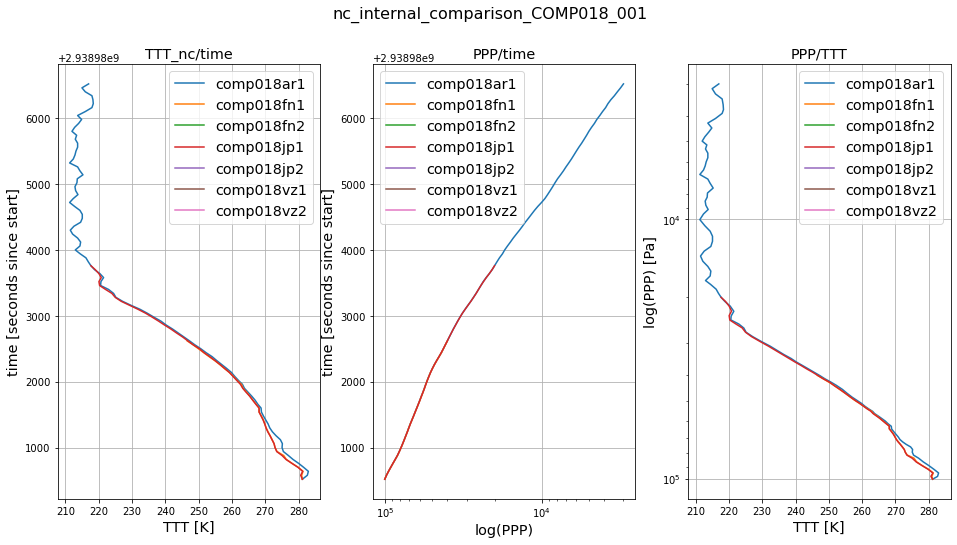

----
4
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


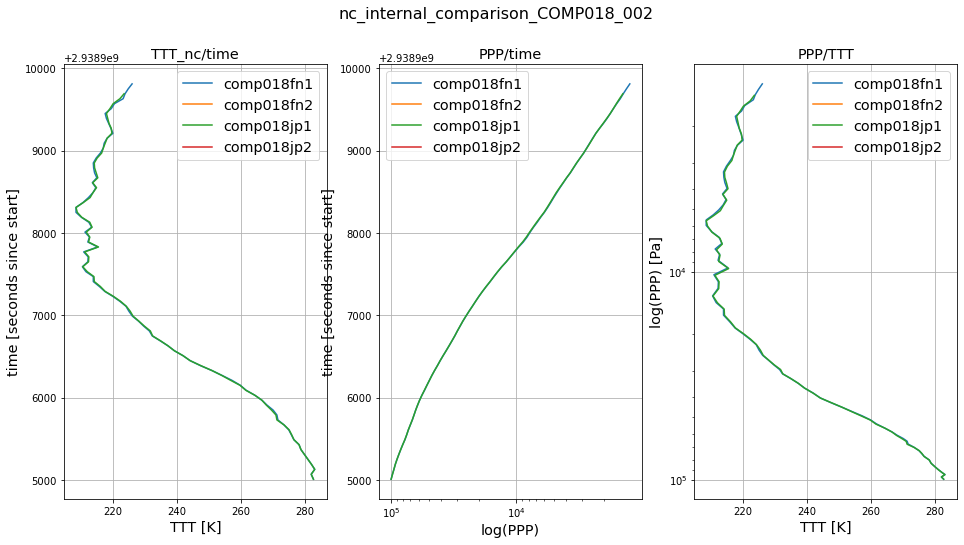

----
6
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


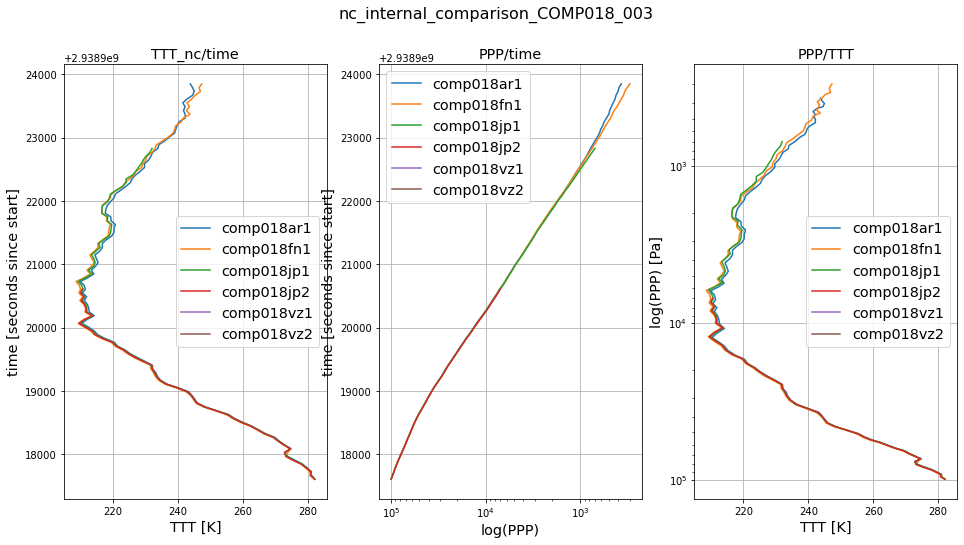

----
7
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01809.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


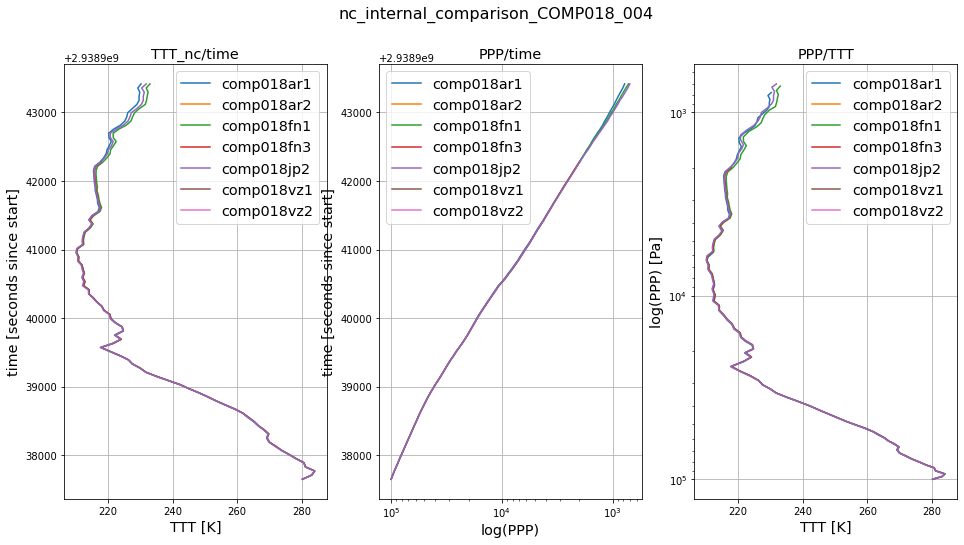

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


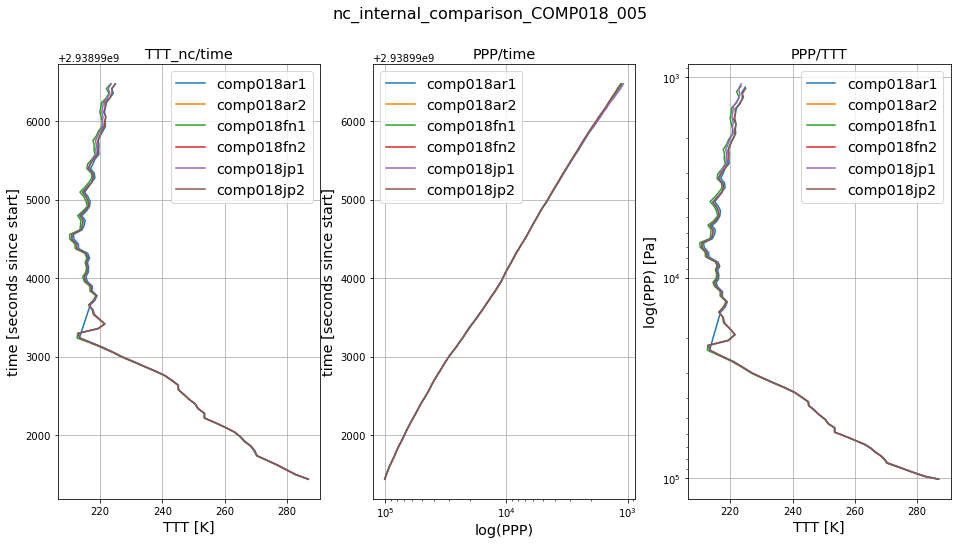

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


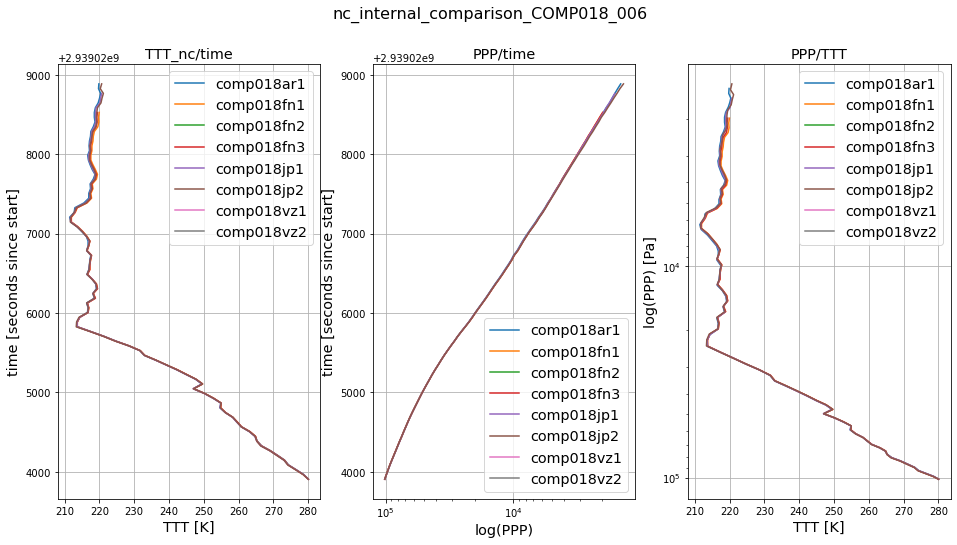

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


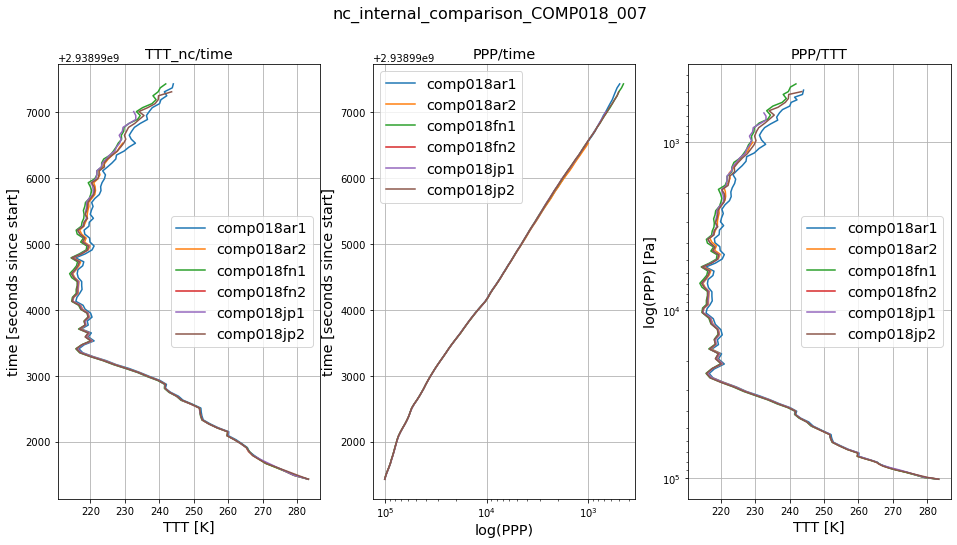

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


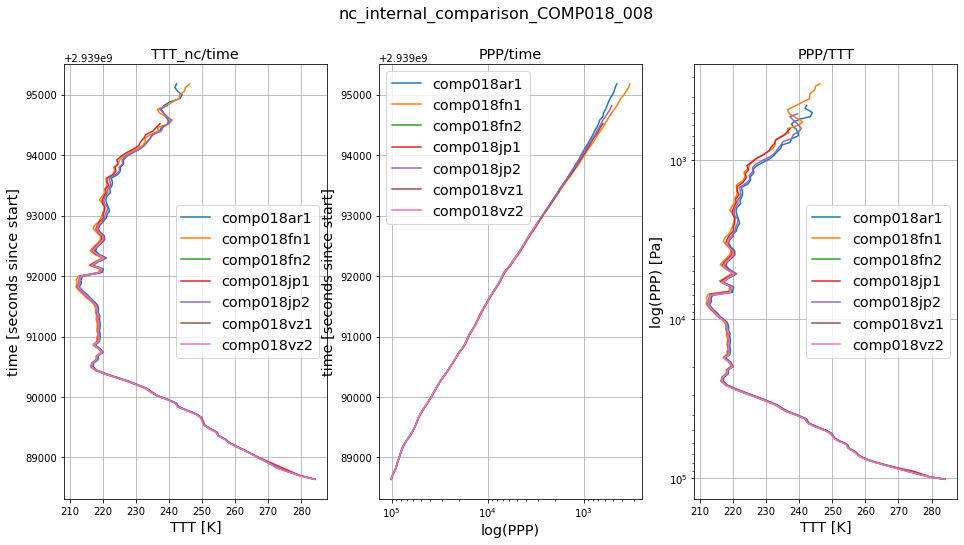

----
7
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


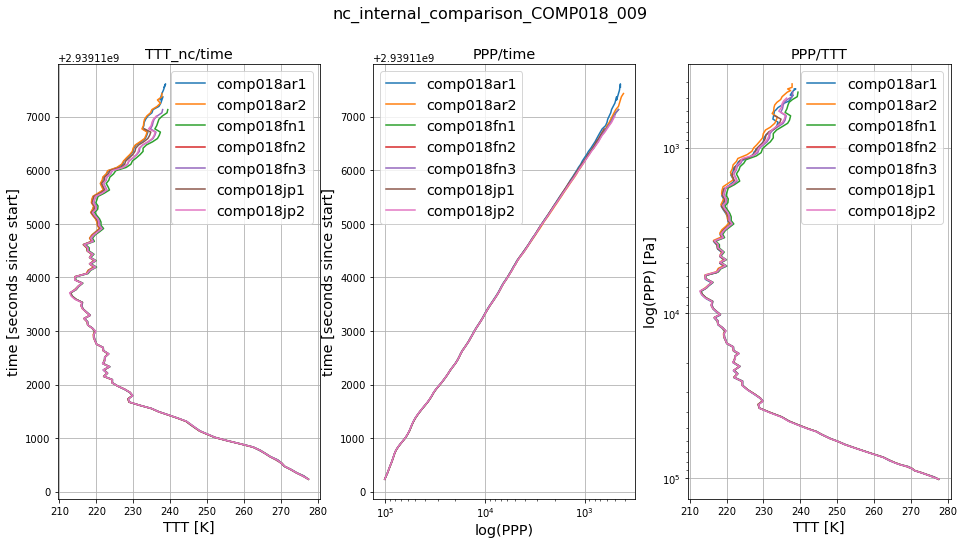

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


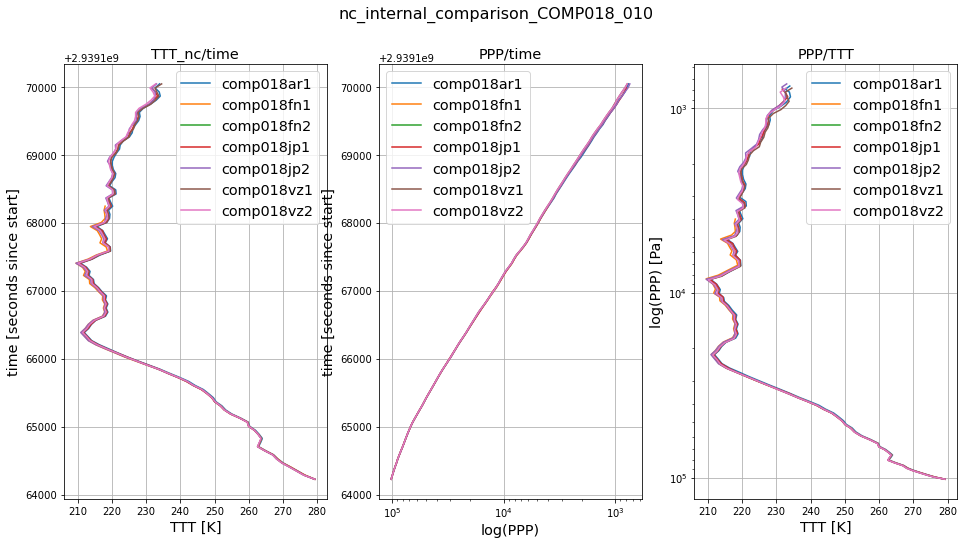

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


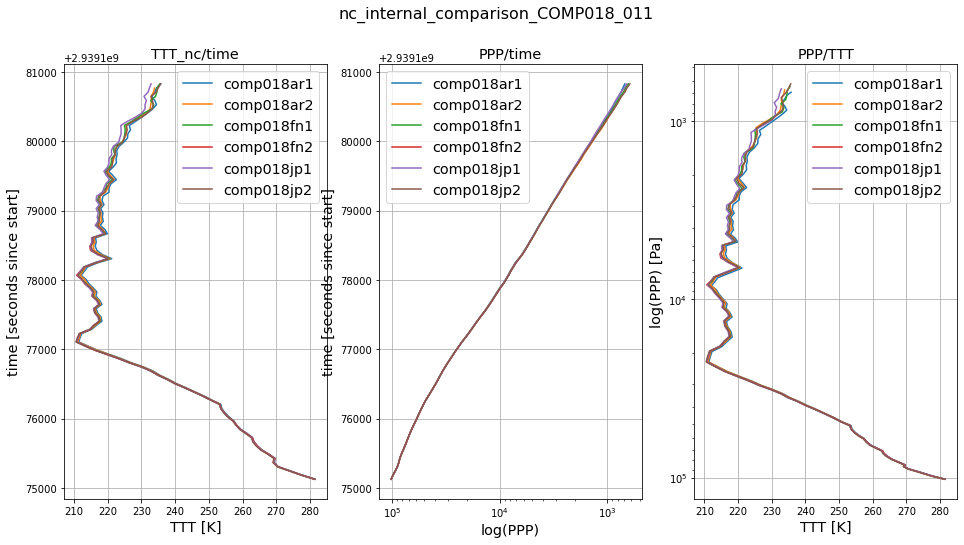

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


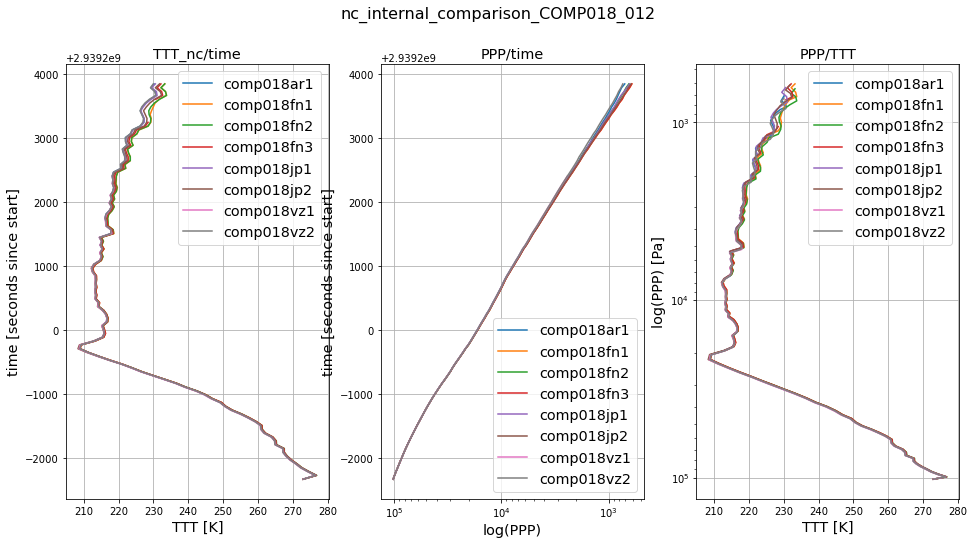

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


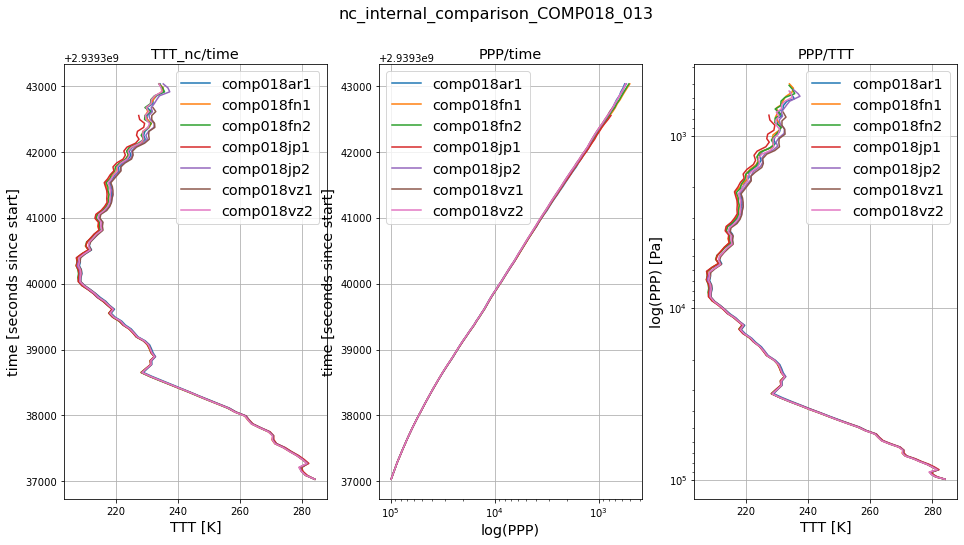

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


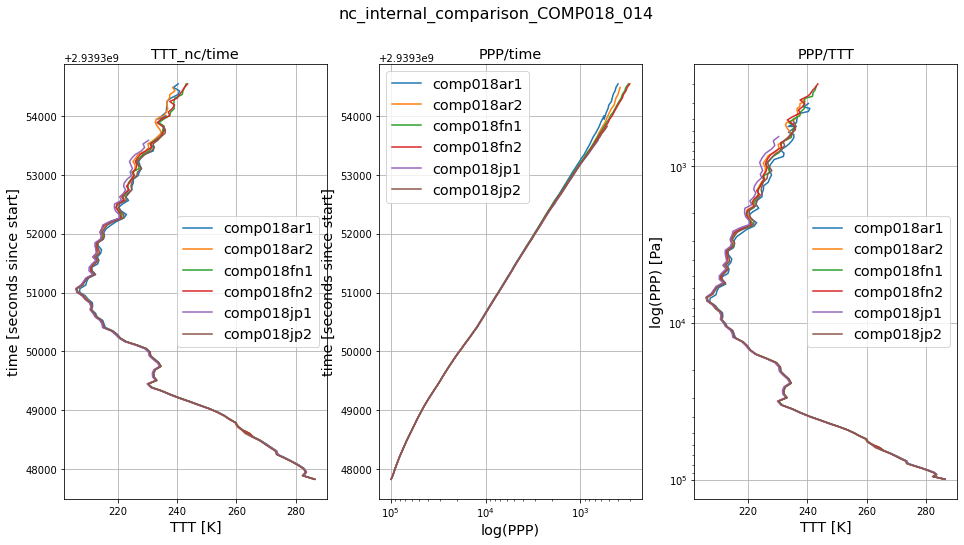

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


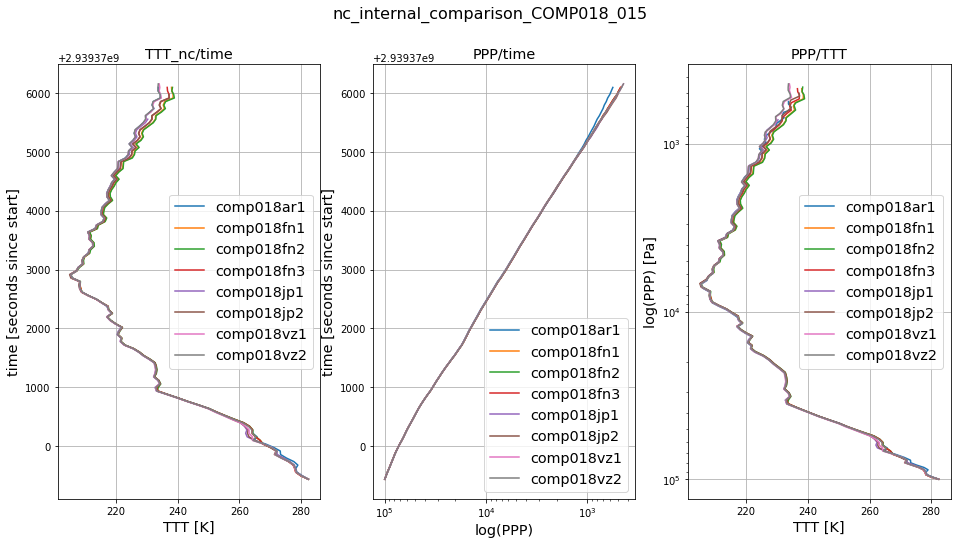

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


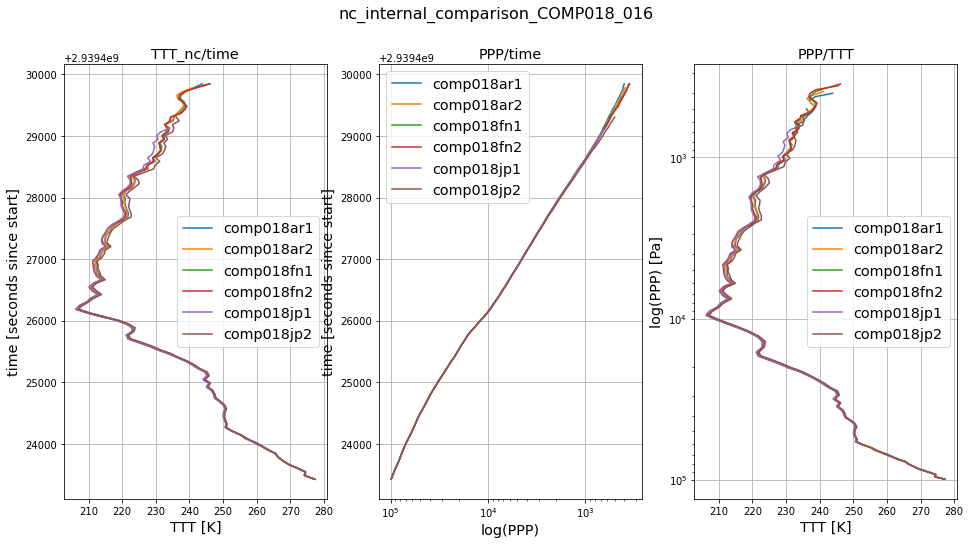

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


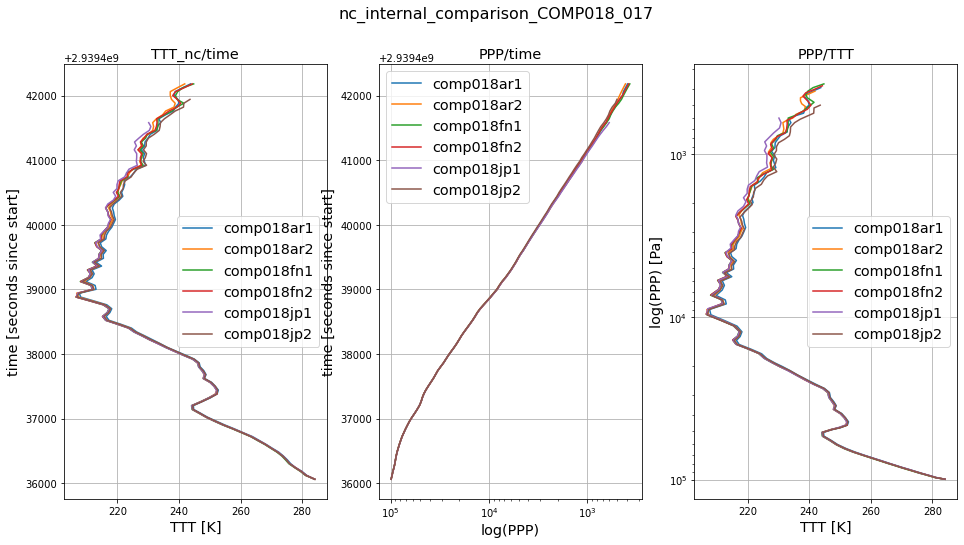

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


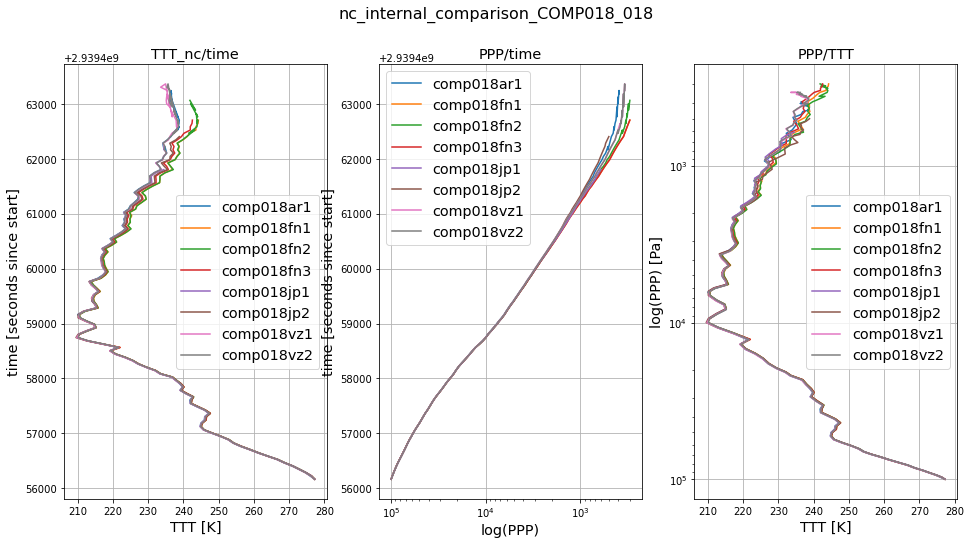

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


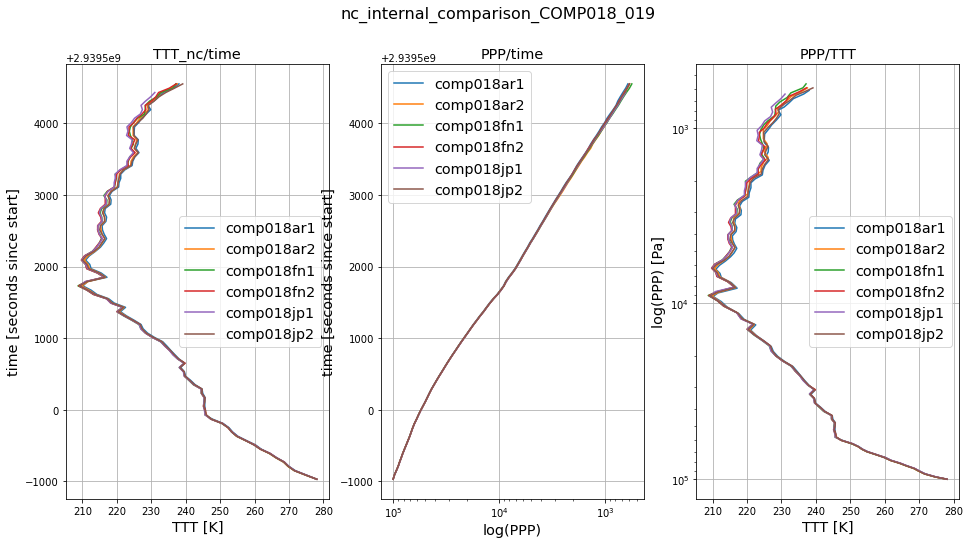

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


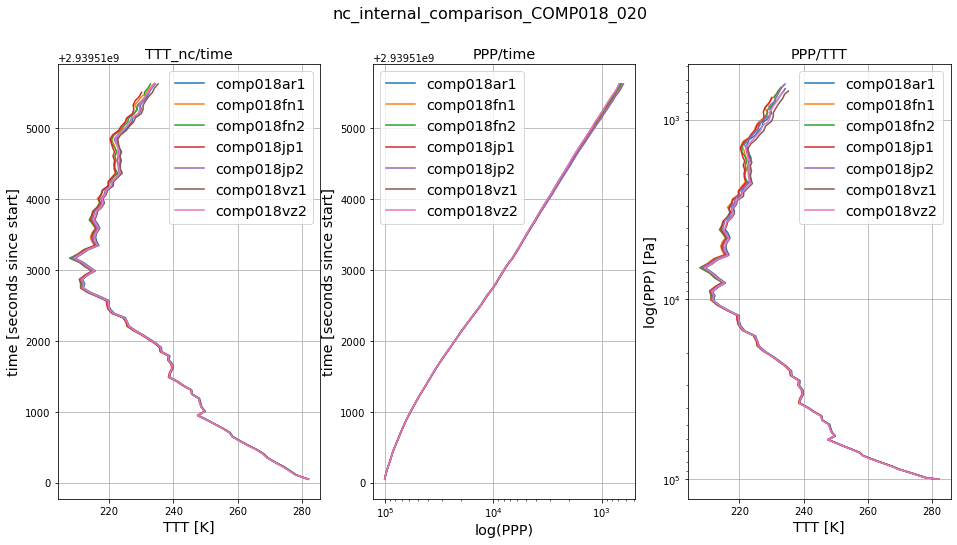

----
6
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


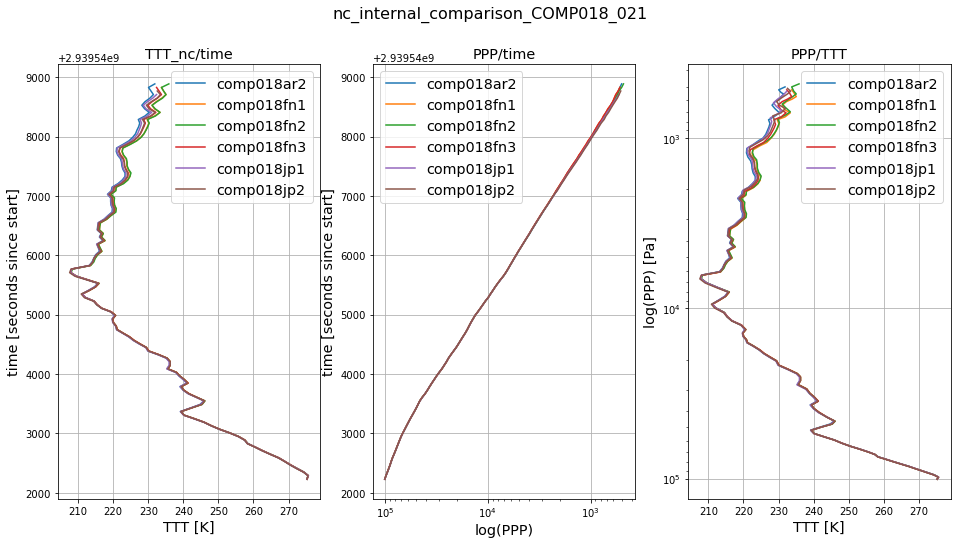

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


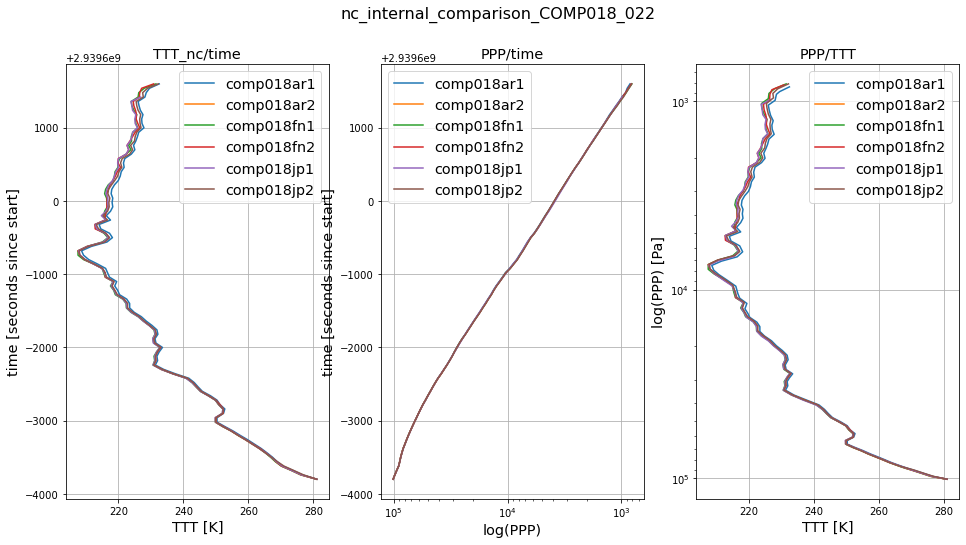

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


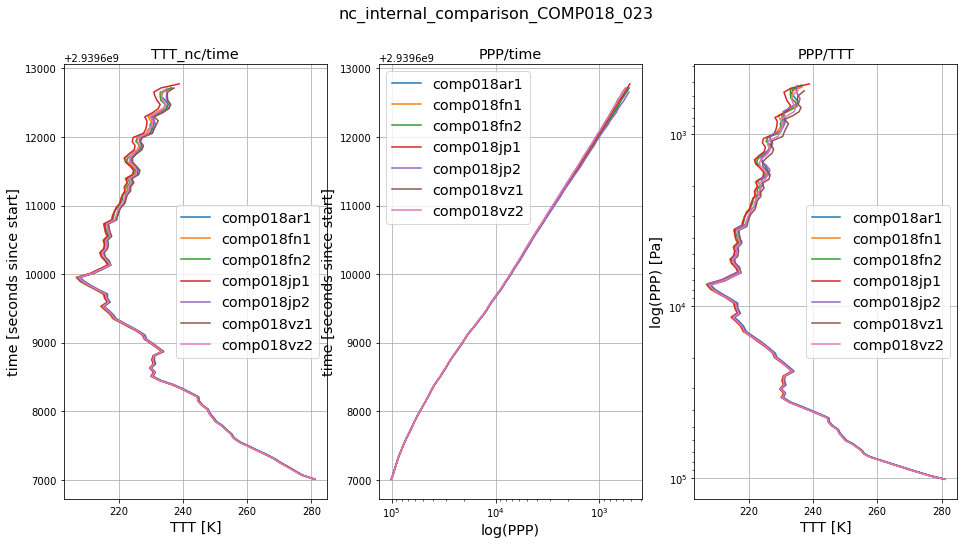

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


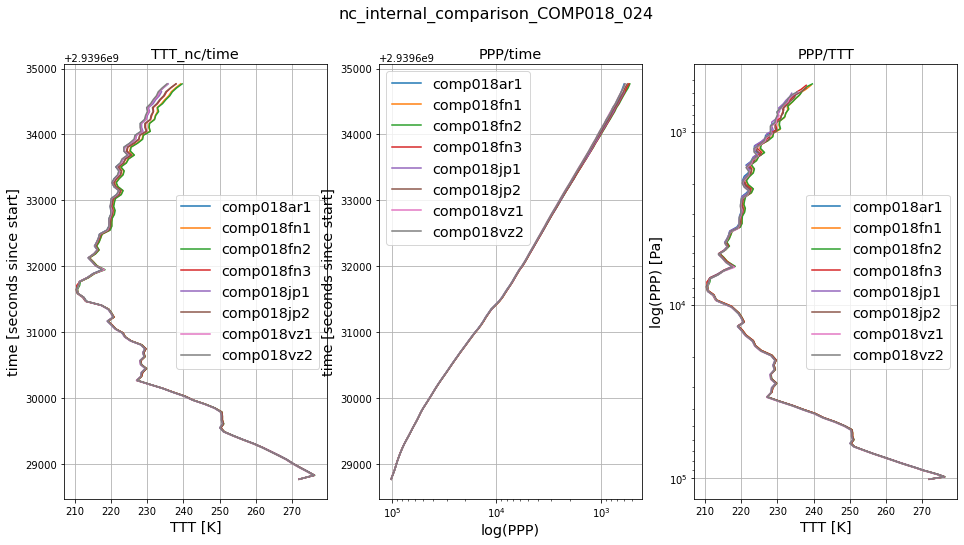

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


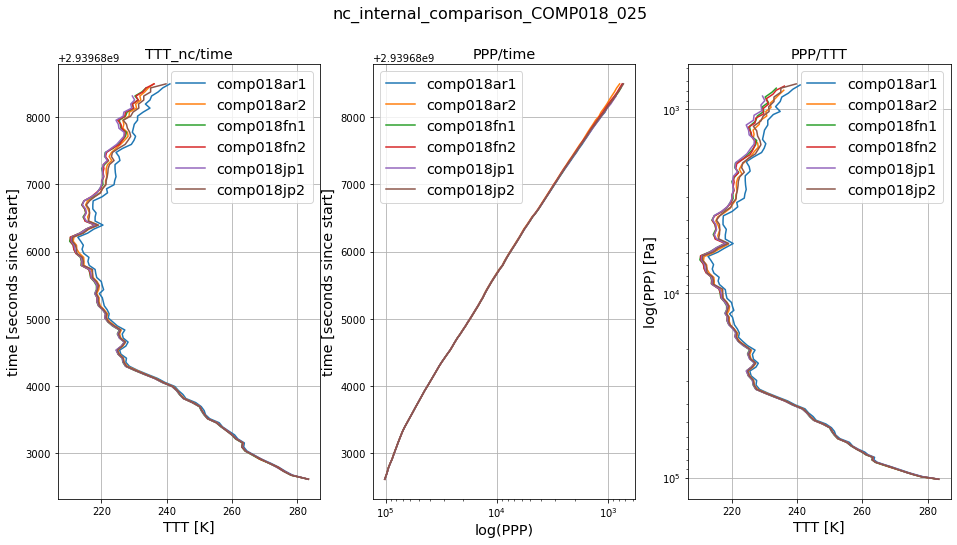

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


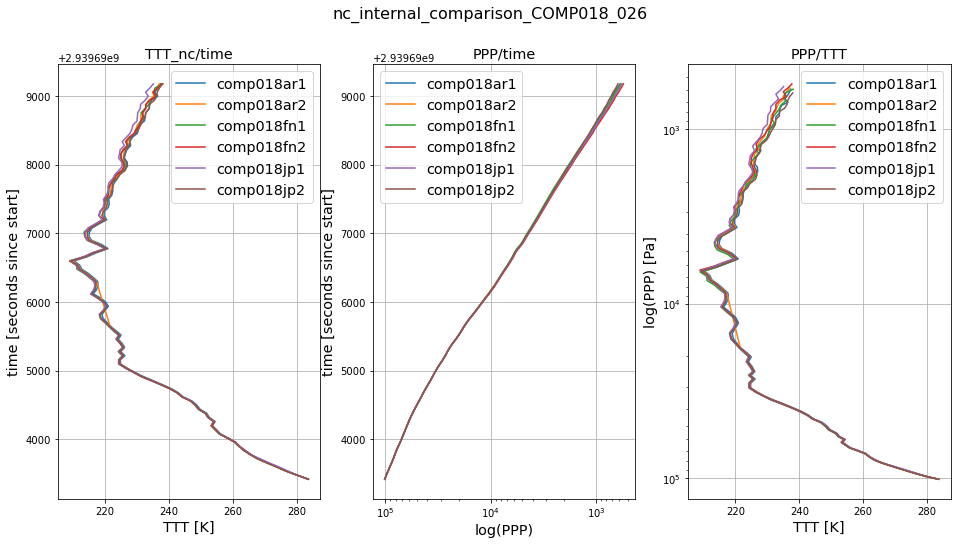

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


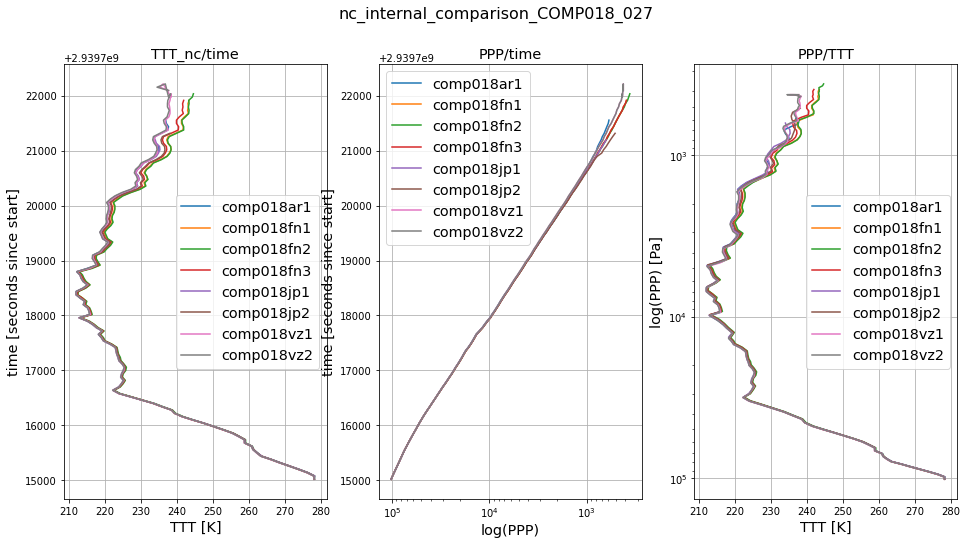

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


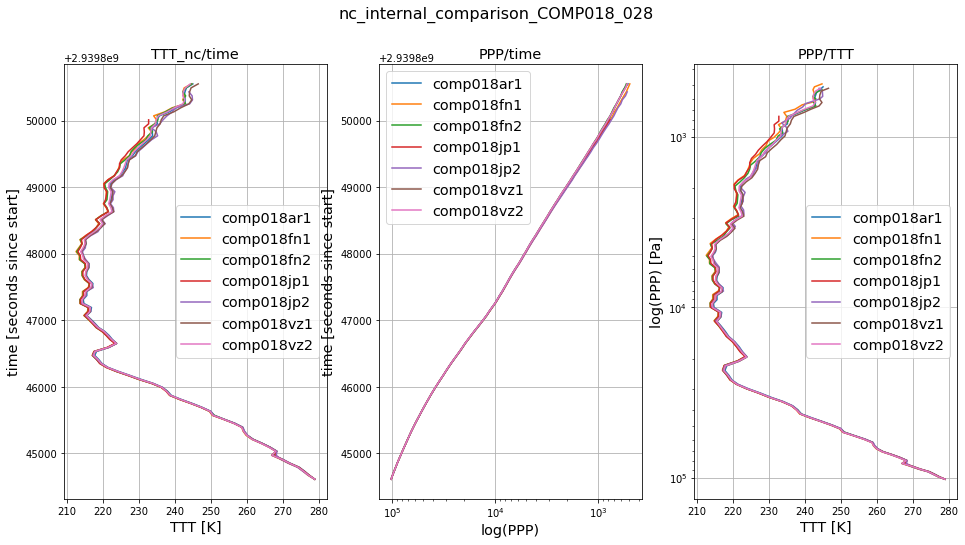

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


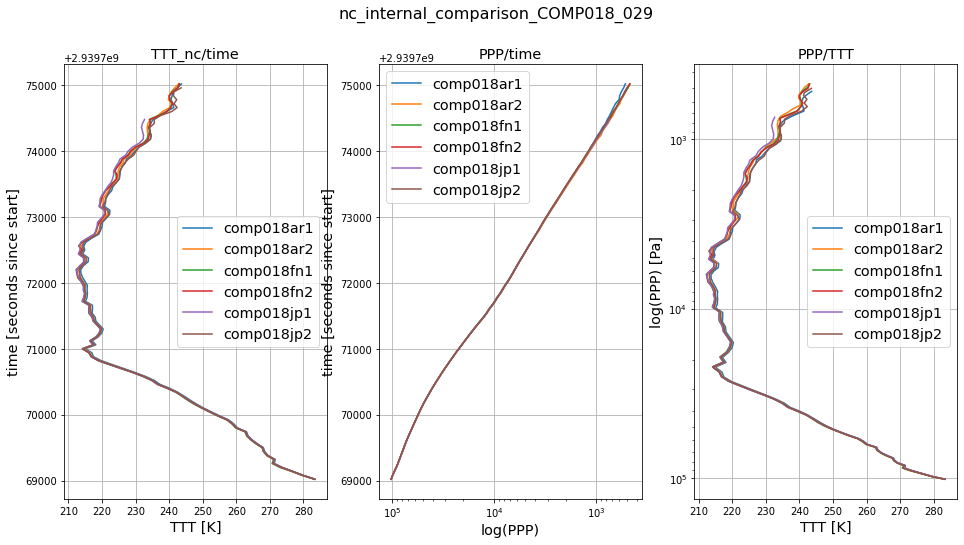

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


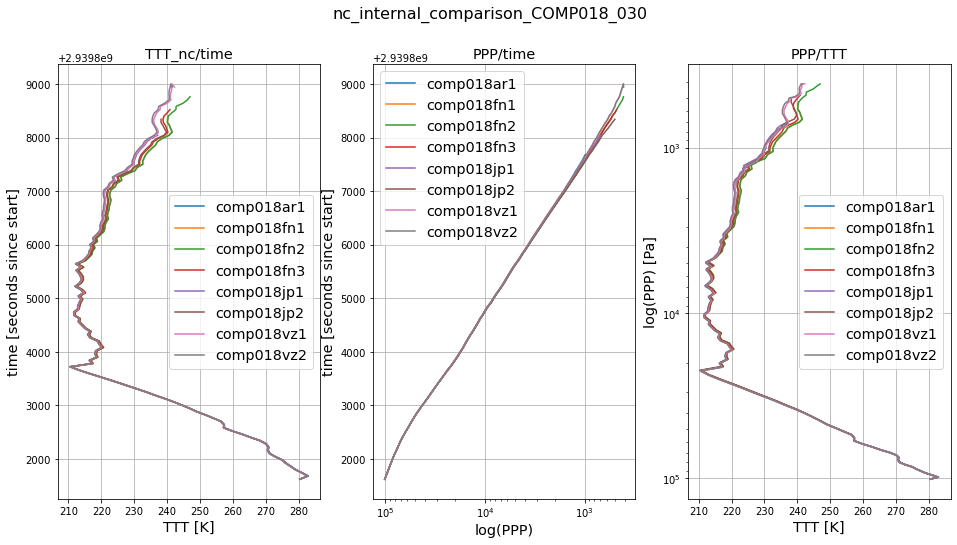

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


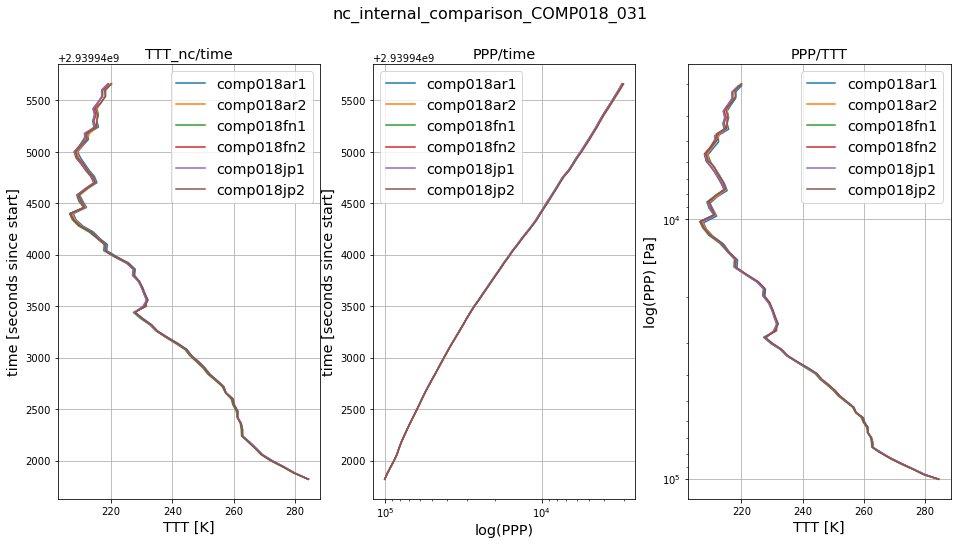

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


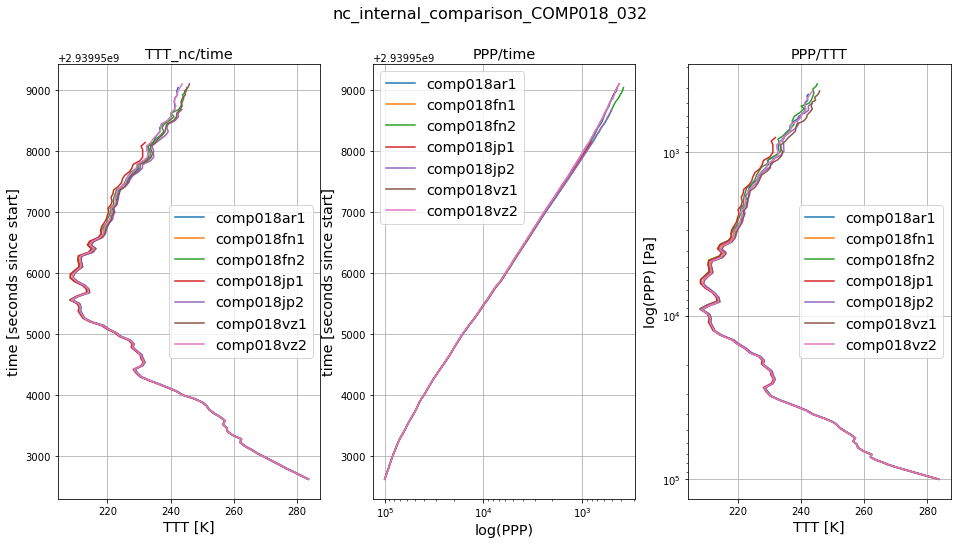

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


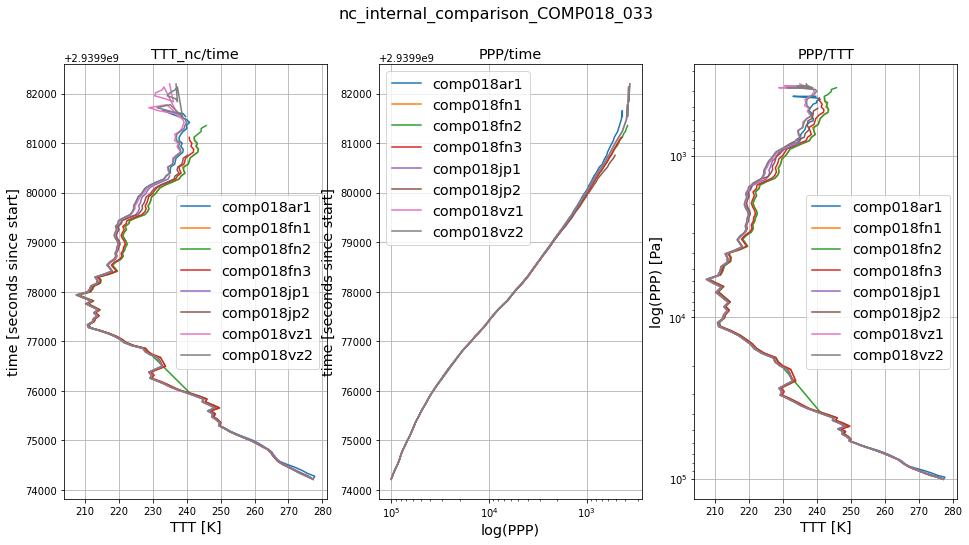

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


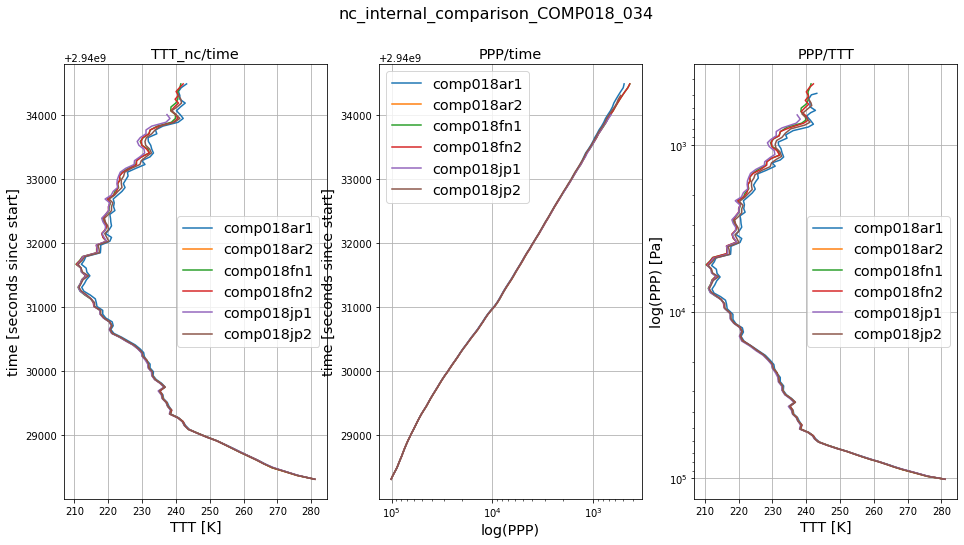

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


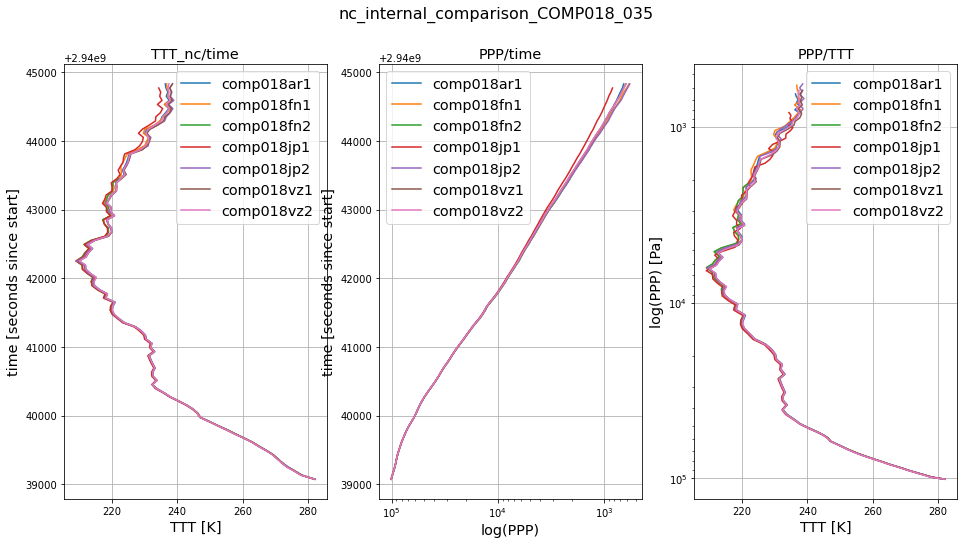

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


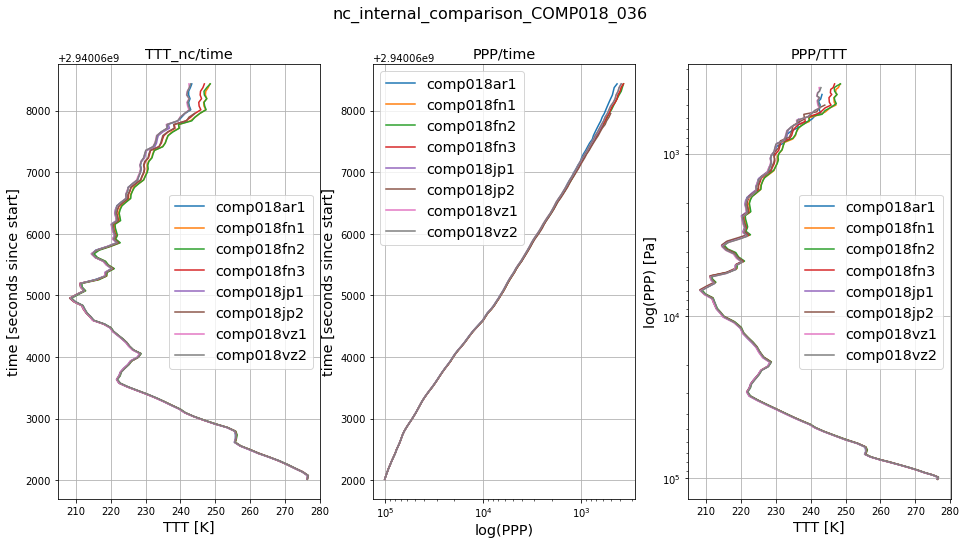

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


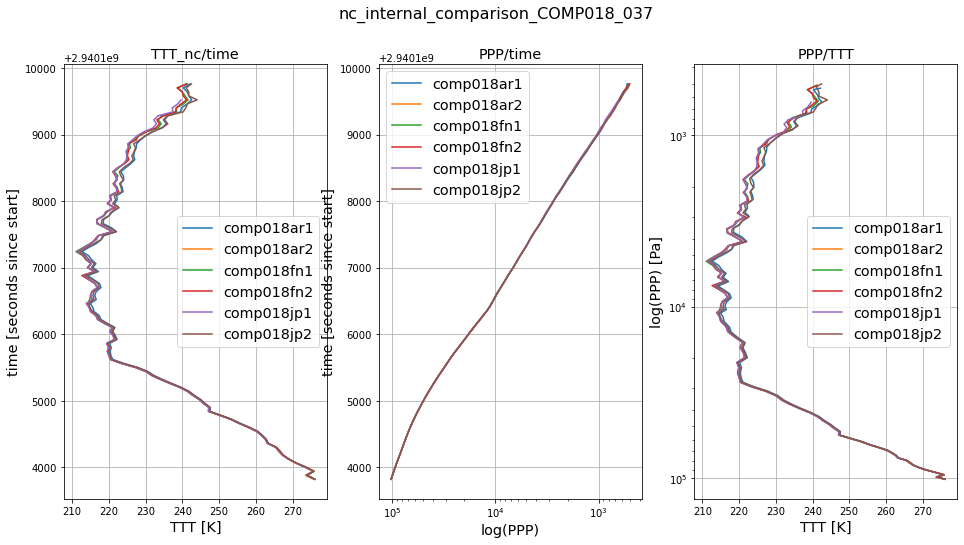

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


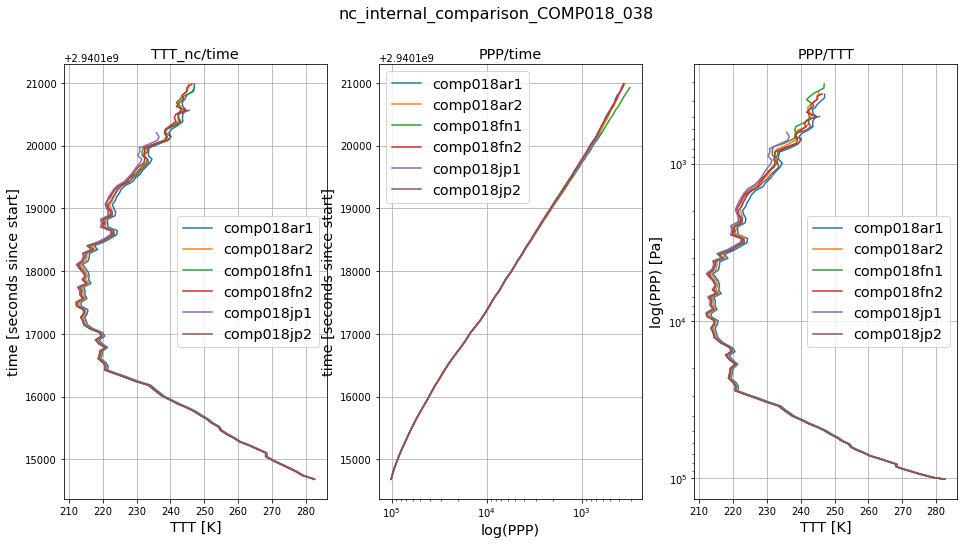

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


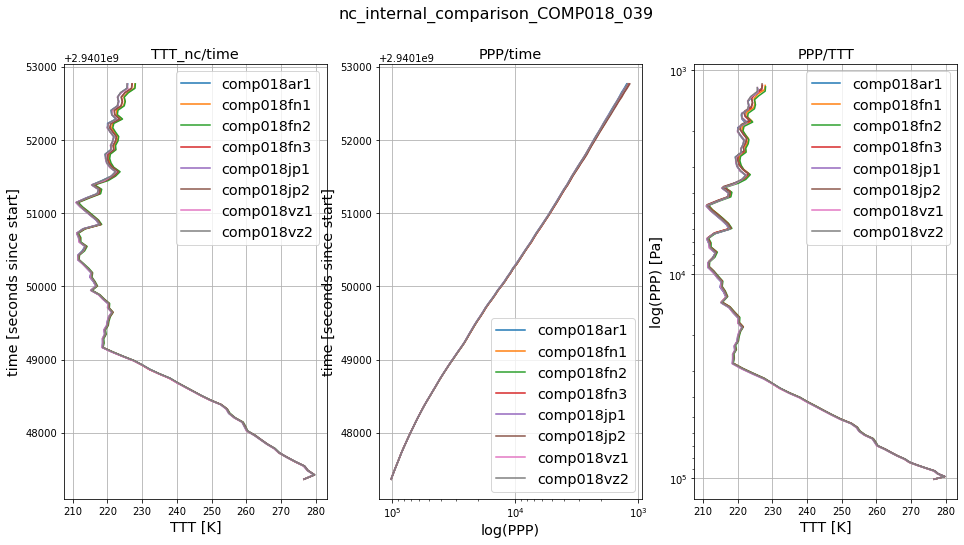

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


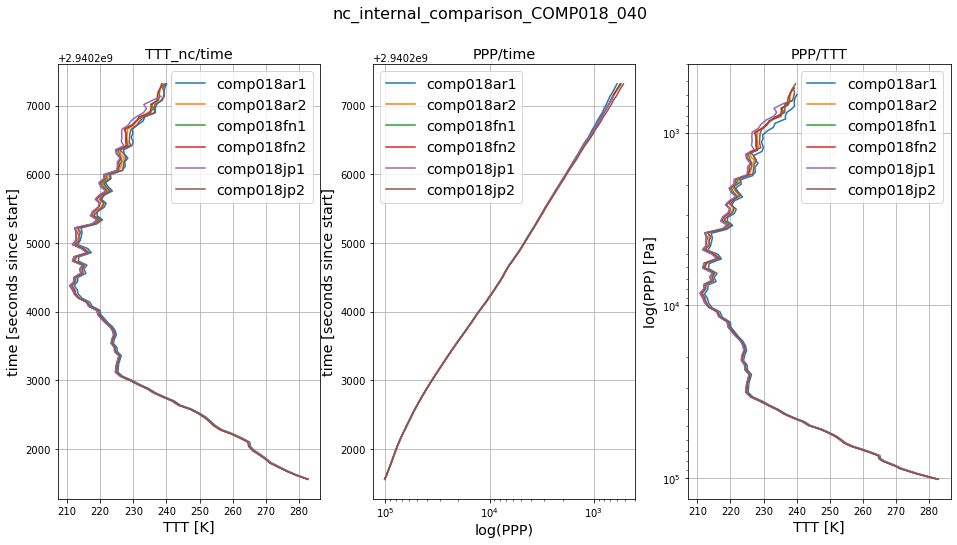

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


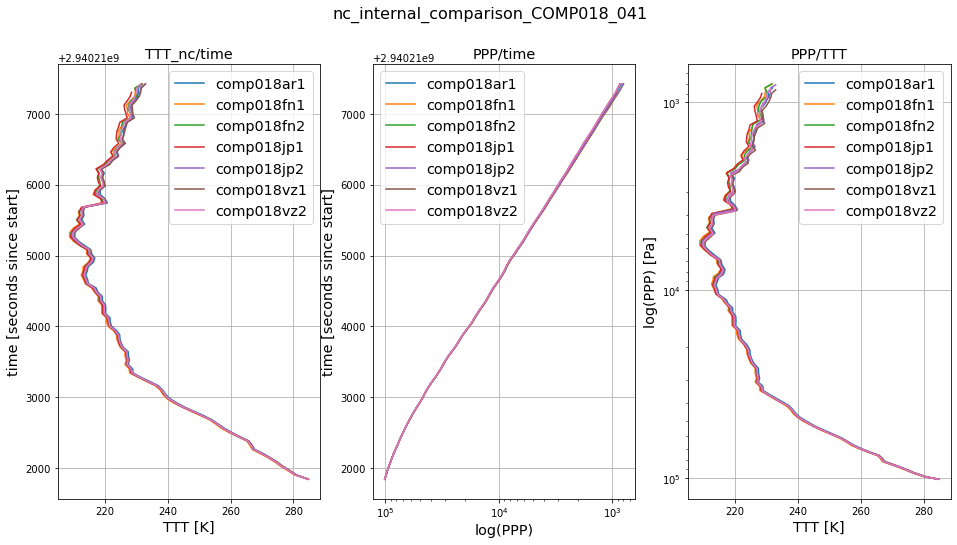

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


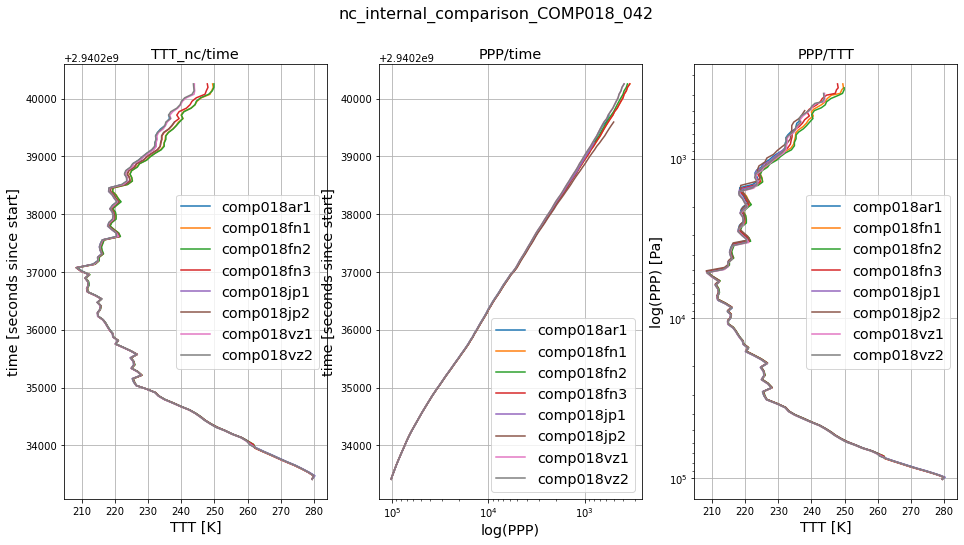

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


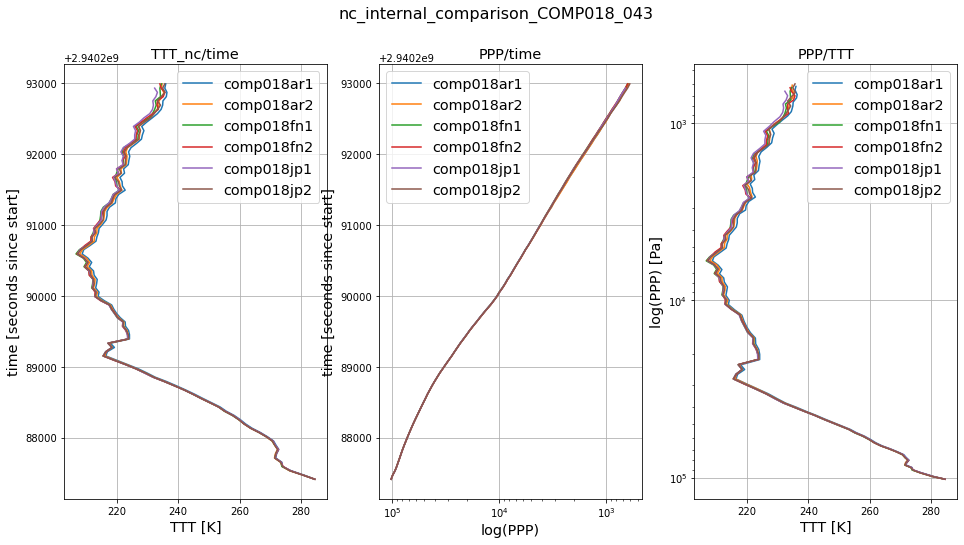

----
6
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc


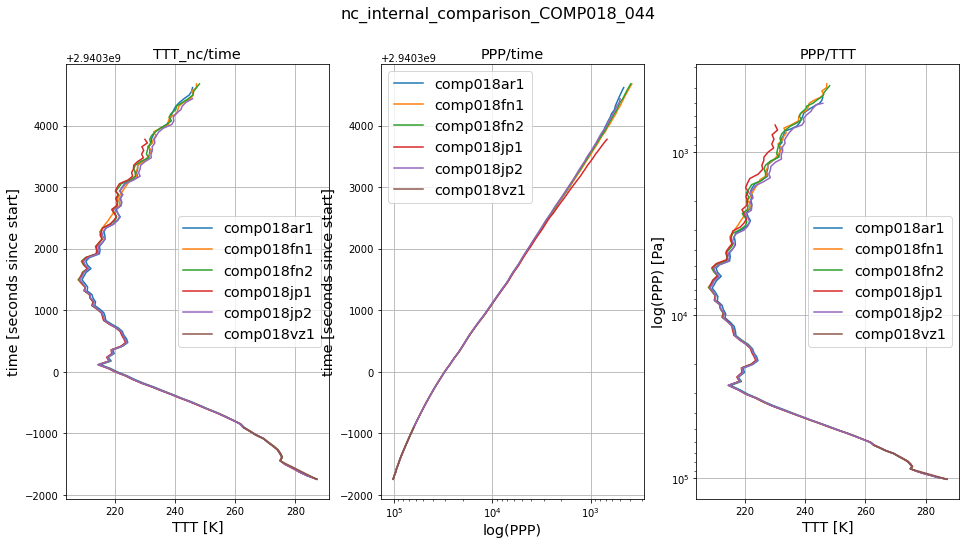

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


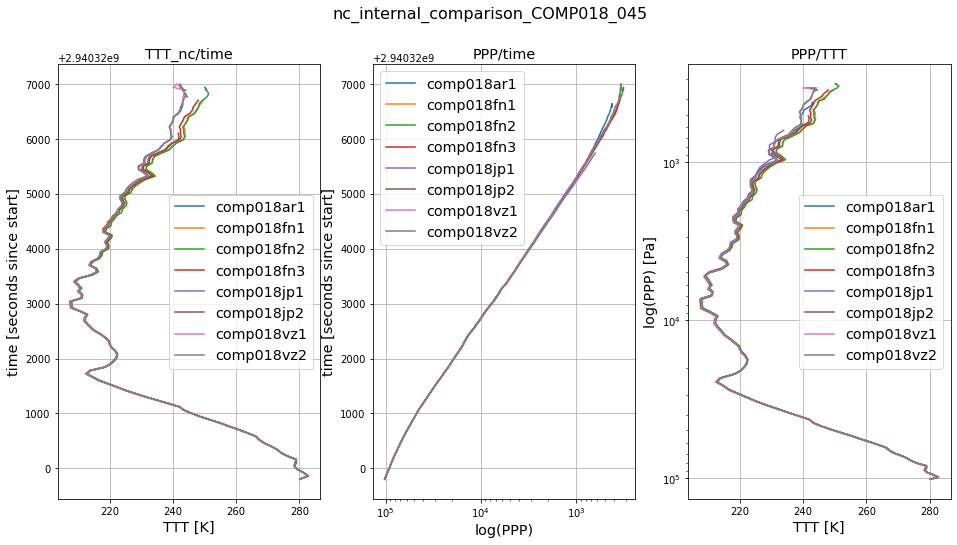

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


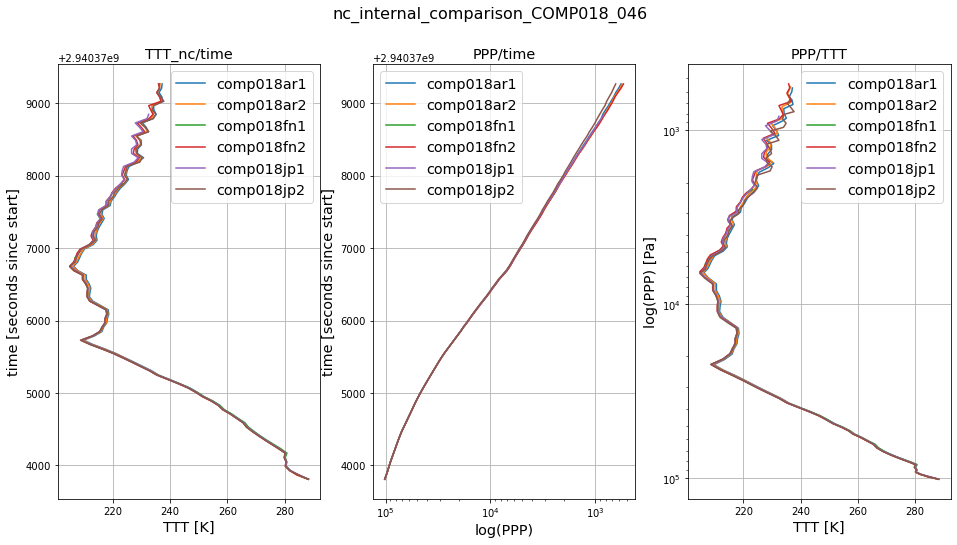

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


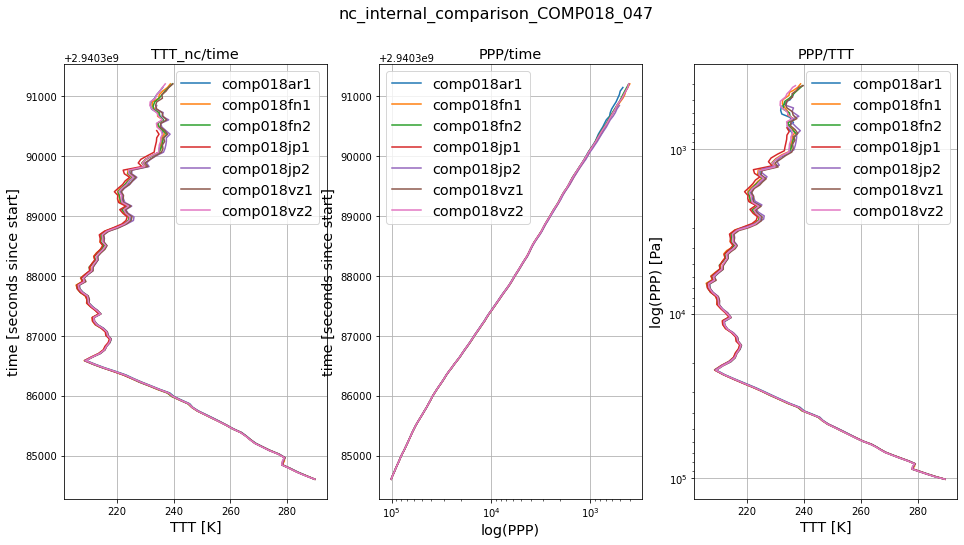

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


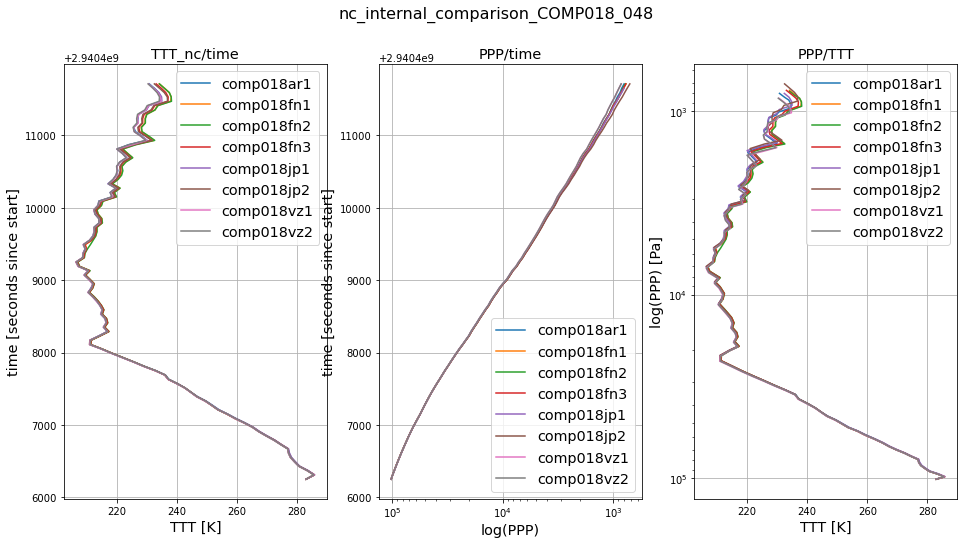

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


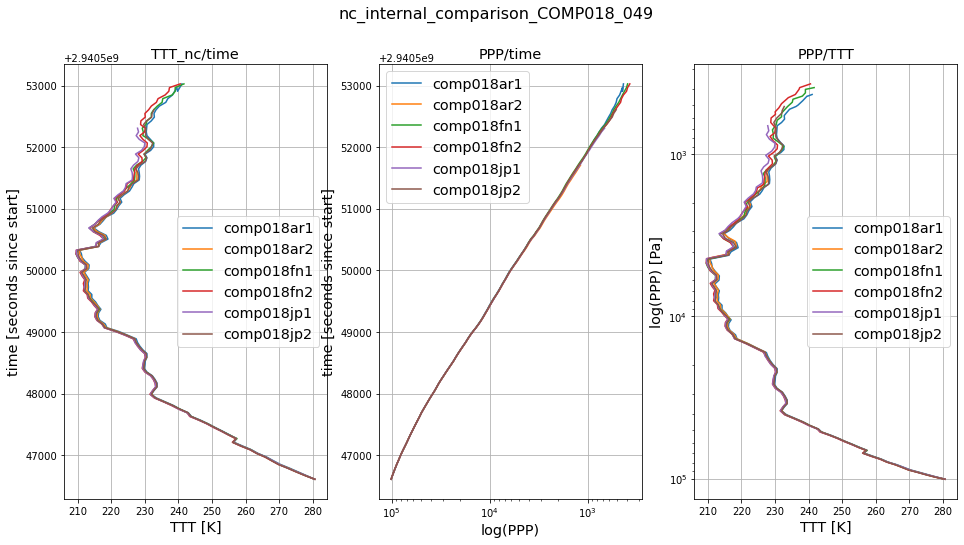

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


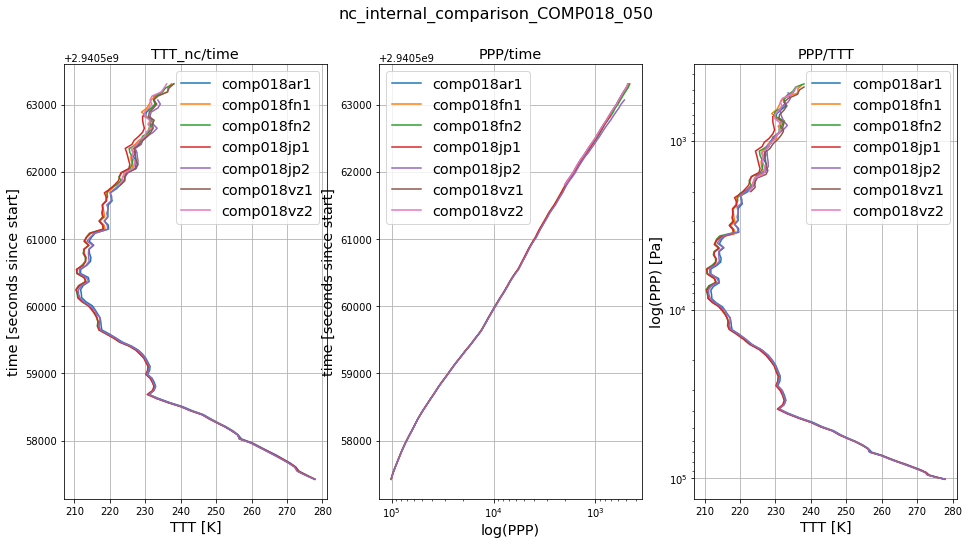

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


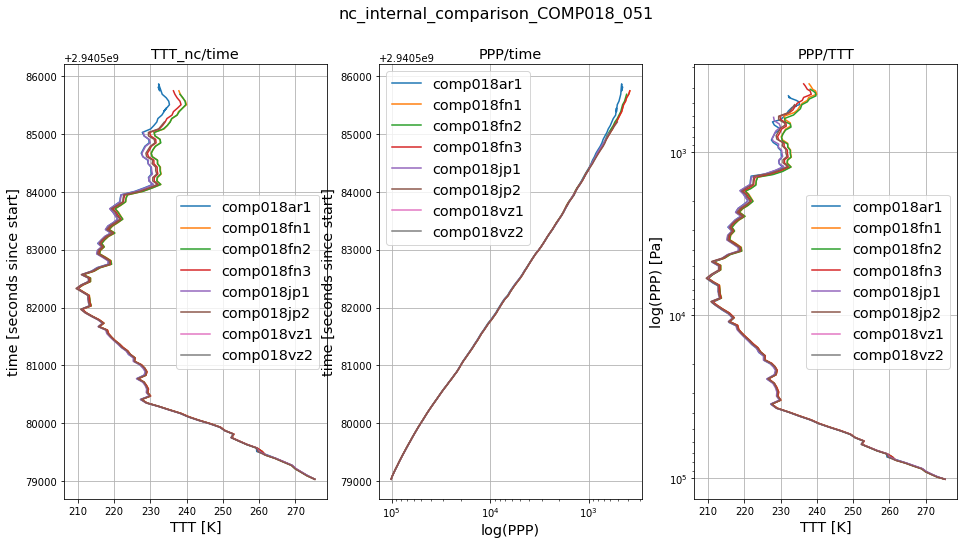

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


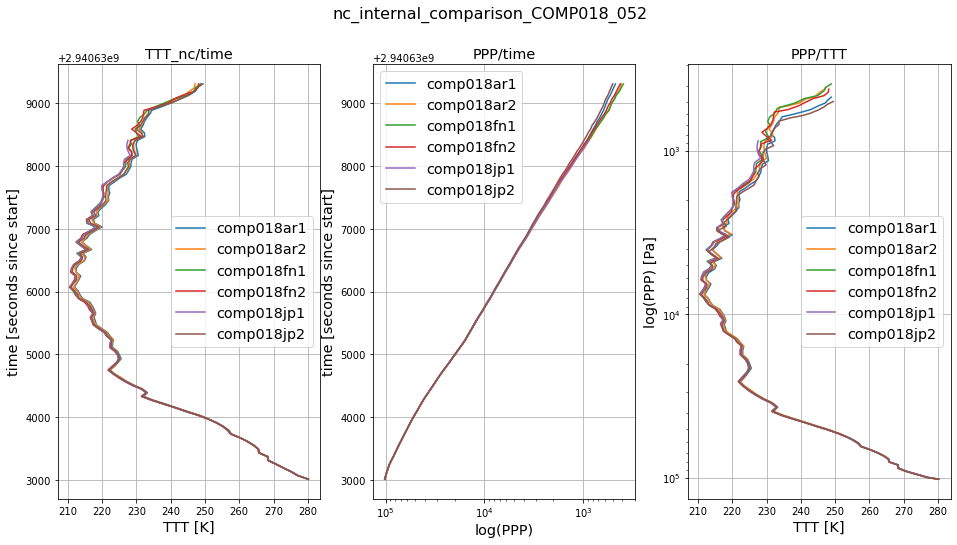

----
6
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


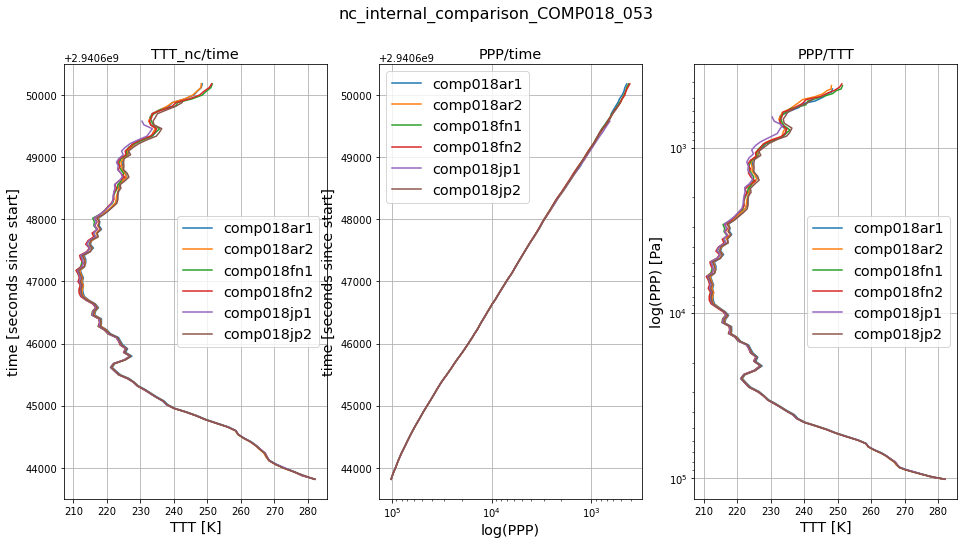

----
7
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


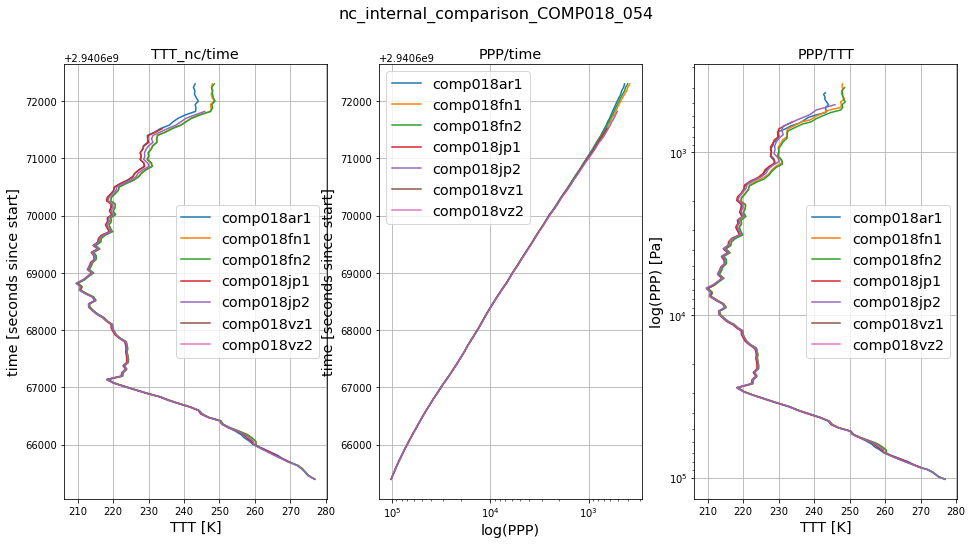

----
5
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


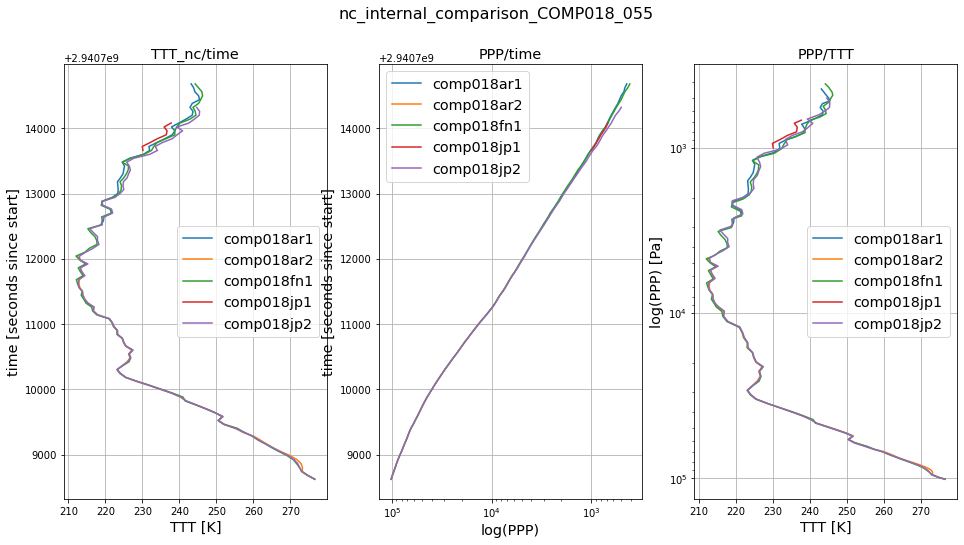

----
5
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01804.nc
0-20100-0-01805.nc


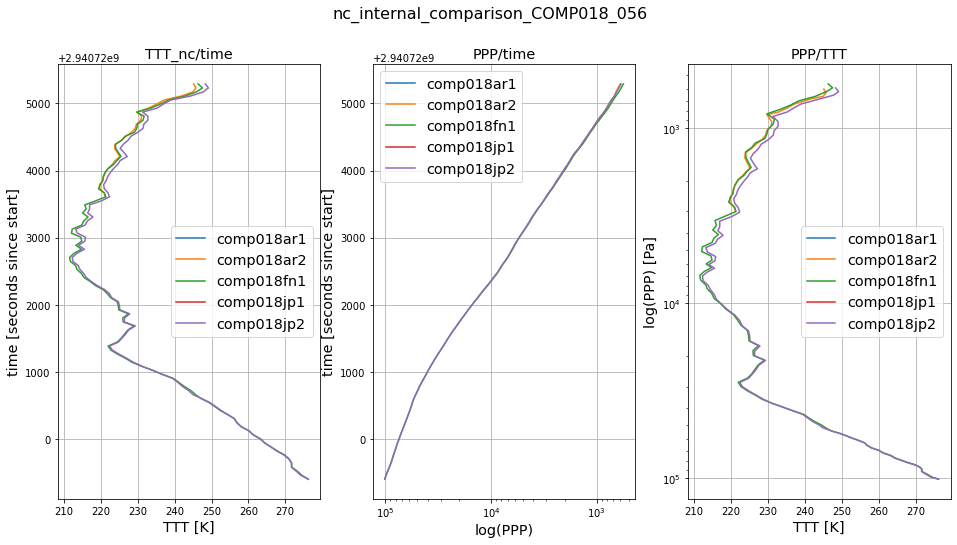

----
7
0-20100-0-01801.nc
0-20100-0-01808.nc
0-20100-0-01802.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


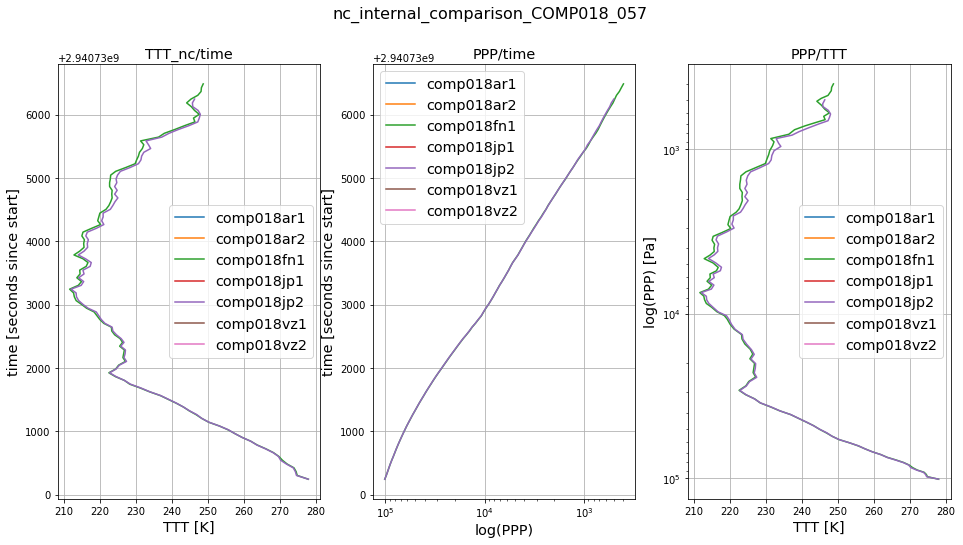

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


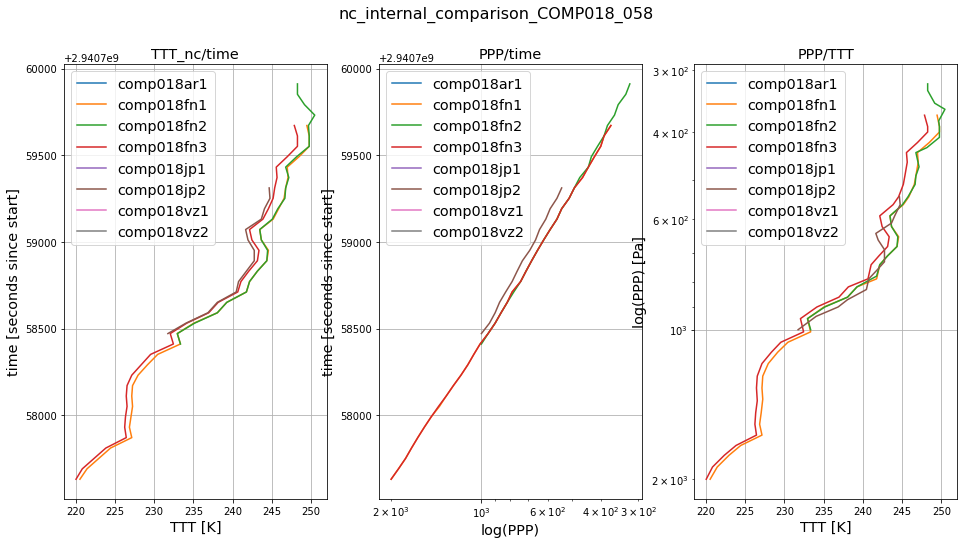

----
6
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


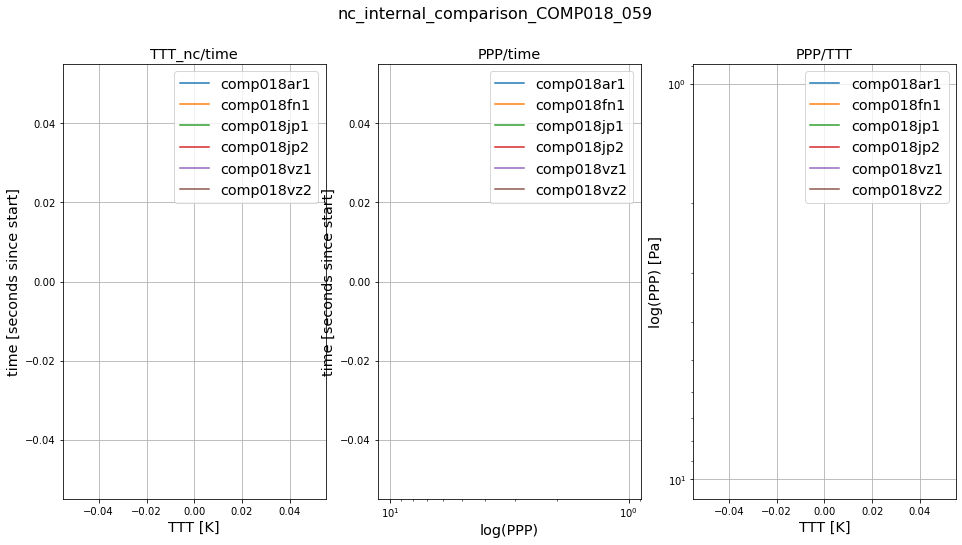

----
8
0-20100-0-01801.nc
0-20100-0-01802.nc
0-20100-0-01803.nc
0-20100-0-01809.nc
0-20100-0-01804.nc
0-20100-0-01805.nc
0-20100-0-01806.nc
0-20100-0-01807.nc


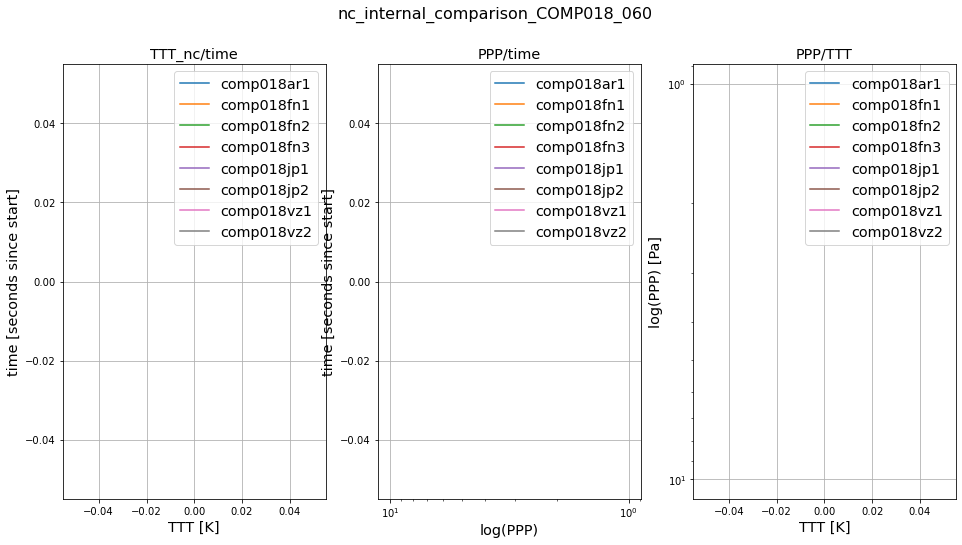

----


In [3]:
comp = 'COMP018'

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/COMP/' +comp+ '/' +comp+ '_ListProfiles.xls'
df = pandas.read_excel(file)

file = r'/raid60/scratch/leo/scratch/RI/Pangaea/nc/mapping.tsv'
tsv_read = pandas.read_csv(file, sep='\t')
tsv_read['Comparison'][0] , tsv_read['File'][0]

# get each timeseries from one ascent
comps = []
for i in df.drop_duplicates(subset=['id_ascent'])['id_ascent']:
    comps.append(df[df['id_ascent'] == i])

# iterate over all ascents (groups of timeseries)
for j in comps:
    sondlist = np.array(j.ri_name)
    print(len(j))
    if(len(j) <= 1):
        print('nothing to compare - one ascent or less')
        continue
#     iterate over each sensor teamseries in the ascent group
    temp = []
    pres = []
    time = []
    for i in range(len(j)):
#         iterate through the tsv
        for k in range(len(tsv_read)):
#         find the right .nc file throug the sensor name
            if(tsv_read['Comparison'][k] == j.iloc[i]['ri_name']):
                ncfilename = tsv_read['File'][k]
                break
#         open data and extract only the wanted ascents       
        print(ncfilename)
        data = eua.CDMDataset('/raid60/scratch/leo/scratch/RI/Pangaea/nc/'+ncfilename)

        # selection: creats a slice to read the data, 
        selection = data.read_observed_variable(85, 
                            plevs = eua.std_plevs*100, 
                            times = None,
                            return_index=True
                           )

        x = data.profile_to_dataframe('observations_table', 
                                      ['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'report_id'],
                                      np.where(selection[1])[0],
                                      date_is_index=True)
        
        x = x[x.observed_variable == 85]
        ida = ncfilename[:15] + '-' + j.iloc[i]['id_ascent'][-3:]
        try:
            x = x[x['report_id'] == ida]
        except:
            print('missing Data for: ' + ida + ' in ' + ncfilename)

        temp.append(x.observation_value)
        time.append(x.date_time)
        pres.append(x.z_coordinate)
#     plt and save here
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#     fig.tight_layout()
#     -
    for i in range(len(temp)):
        ax1.plot(temp[i], time[i])
    ax1.set(xlabel ='TTT [K]', ylabel='time [seconds since start]', title='TTT_nc/time')
    ax1.legend(sondlist, loc='best')
    ax1.grid()
#     -
    for i in range(len(pres)):
        ax2.semilogx(pres[i], time[i])
    ax2.set(xlabel='log(PPP)', ylabel ='time [seconds since start]', title='PPP/time')
    ax2.invert_xaxis()
    ax2.legend(sondlist, loc='best')
    ax2.grid()
#     -
    for i in range(len(temp)):
        ax3.semilogy(temp[i], pres[i])
    ax3.set(xlabel ='TTT [K]', ylabel='log(PPP) [Pa]', title='PPP/TTT')
    ax3.invert_yaxis()
    ax3.legend(sondlist, loc='best')
    ax3.grid()
#     -
    picname = 'nc_internal_comparison_'+np.array(j.id_ascent)[0]
    fig.suptitle(picname, fontsize=16)
    plt.show()
#     fig.savefig(picname +'.png')
    plt.close(fig)
    print('----')
#     if(ida == '0-20100-0-00202-054'):
#         break

